In [101]:
#Importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
#Reading the traning file
data = pd.read_csv('./data/train_1.csv').fillna(0)
#page = data['Page']
data.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [128]:
split_page = data['Page'].str.rsplit("_", n = 3, expand = True)
data.insert(loc=0, column='name', value=split_page[0])
data.insert(loc=1, column='project', value=split_page[1])
data.insert(loc=2, column='access', value=split_page[2])
data.insert(loc=3, column='agent', value=split_page[3])
data.head()

,name,project,access,agent,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1,zh.wikipedia.org,all-access,spider,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM,zh.wikipedia.org,all-access,spider,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C,zh.wikipedia.org,all-access,spider,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute,zh.wikipedia.org,all-access,spider,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You,zh.wikipedia.org,all-access,spider,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [129]:
data.insert(loc=4, column='total', value=pd.Series(data.loc[:,'2015-07-01':].sum(axis=1)))
data.insert(loc=5, column='mean', value=pd.Series(data.loc[:,'2015-07-01':].median(axis=1)))
data.insert(loc=6, column='std', value=pd.Series(data.loc[:,'2015-07-01':].std(axis=1)))
data = data.drop(['project'], axis=1)

#drop all day data
data = data.loc[:,:'std']

#drop total <= 1000
data = data[data.total >= 1000.0]
#print(data)
data.head()

,name,access,agent,total,mean,std
0,2NE1,all-access,spider,11966.0,16.0,29.390758
1,2PM,all-access,spider,13966.0,17.0,33.984813
2,3C,all-access,spider,2862.0,4.0,13.505932
3,4minute,all-access,spider,9419.0,13.0,19.337118
4,52_Hz_I_Love_You,all-access,spider,2662.0,0.0,17.323028


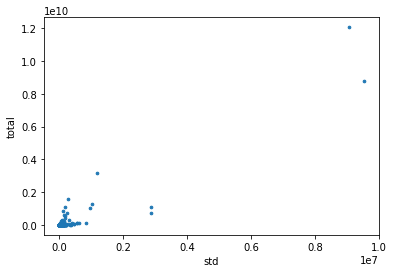

In [130]:
#plot data
ax = data.plot.scatter(x='std',
                      y='total',
                      s=7)

#gerando os dados somados para todos os dias e ordenado
data_fil=data.sort_values(by=['total'], ascending=False)
data_fil.to_csv('data_fil_sorted.csv')

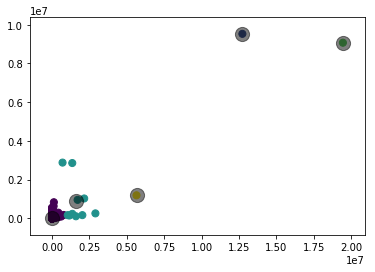

In [151]:
from sklearn.cluster import KMeans

X = np.array(list(zip(data.loc[:,'mean'], data.loc[:,'std'])))
n_cluster = 5
kmeans = KMeans(n_clusters=n_cluster)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


In [154]:
for i in range(n_cluster): 
    print('cluster ',i,':')
    print(data.loc[kmeans.labels_==i,['name','total']])

cluster  0 :
                                                     name    total
0                                                    2NE1  11966.0
1                                                     2PM  13966.0
2                                                      3C   2862.0
3                                                 4minute   9419.0
4                                        52_Hz_I_Love_You   2662.0
5                                                    5566   9027.0
6                                                  91Days   3643.0
7                                                   A'N'D  27308.0
8                                                   AKB48  19254.0
9                                                   ASCII  12280.0
10                                                  ASTRO   9670.0
11                                      Ahq_e-Sports_Club   6873.0
12                         All_your_base_are_belong_to_us   2626.0
13                                               